<a href="https://colab.research.google.com/github/minhduchoang301/OCR-community-website/blob/master/Character_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install craft-text-detection

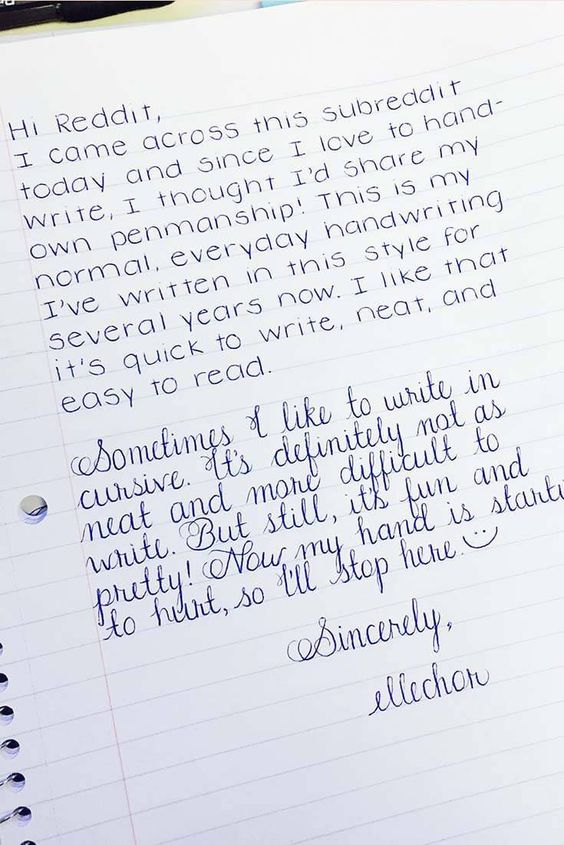

In [3]:
import craft
import cv2
from google.colab.patches import cv2_imshow
path = r"/content/sample.jpg"
img = cv2.imread(path)
cv2_imshow(img) 

In [0]:
bboxes, polys, heatmap = craft.detect_text(img, link_threshold = 99999999, text_threshold = 0.4)

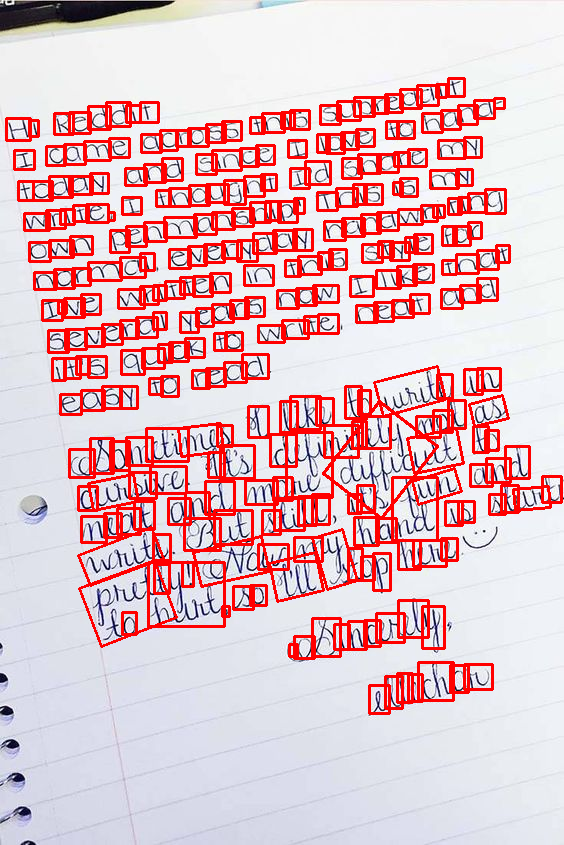

In [5]:
img_boxed = craft.show_bounding_boxes(img, bboxes)
cv2_imshow(img_boxed)

In [6]:
print(bboxes)

[[[448.        78.666664]
  [464.        78.666664]
  [464.        96.      ]
  [448.        96.      ]]

 [[436.        84.      ]
  [446.66666   84.      ]
  [446.66666   97.333336]
  [436.        97.333336]]

 [[417.33334   85.333336]
  [438.66666   85.333336]
  [438.66666  105.333336]
  [417.33334  105.333336]]

 ...

 [[408.       674.6667  ]
  [422.66666  674.6667  ]
  [422.66666  701.3333  ]
  [408.       701.3333  ]]

 [[385.33334  676.      ]
  [402.66666  676.      ]
  [402.66666  708.      ]
  [385.33334  708.      ]]

 [[369.33334  685.3333  ]
  [389.33334  685.3333  ]
  [389.33334  713.3333  ]
  [369.33334  713.3333  ]]]


In [0]:
i = 0
for i in range(len(bboxes)):
  x1 = bboxes[i][0][0]
  y1 = bboxes[i][0][1]
  x2 = bboxes[i][1][0]
  y2 = bboxes[i][1][1]
  x3 = bboxes[i][2][0]
  y3 = bboxes[i][2][1]
  x4 = bboxes[i][3][0]
  y4 = bboxes[i][3][1]

  top_left_x = int(min([x1,x2,x3,x4]))
  top_left_y = int(min([y1,y2,y3,y4]))
  bot_right_x = int(max([x1,x2,x3,x4]))
  bot_right_y = int(max([y1,y2,y3,y4]))

  letter = img[top_left_y:bot_right_y, top_left_x:bot_right_x]
  cv2.imwrite("/content/result/crop" + str(i) + ".jpg", letter)